In [95]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import dlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [96]:
delaunayColor = (255,255,255)
pointsColor = (0,0,255)

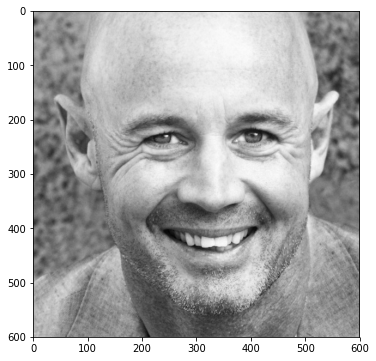

In [97]:
img = cv2.imread("smiling-man.jpg")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [98]:
size = img.shape
rect = (0, 0, size[1], size[0])
subdiv = cv2.Subdiv2D(rect)
# Allocate space for voronoi Diagram
imgVoronoi = np.zeros(img.shape, dtype = img.dtype)
outputFileName = 'smiling-man-delaunay.tri'

In [99]:
def drawpoints(img,p):
    cv2.circle(img,p, 2, pointsColor, -1, cv2.LINE_AA, 0)

In [100]:
def get_landmarks(img):
#     facedetector = dlib.get_frontal_face_detector()
#     landmarkdetector = dlib.shape_predictor("D://OpenCV-II-Applications//shape_predictor_68_face_landmarks.dat")
#     faces = facedetector(gray_img)
#     for i in faces:
#         landmarkpointsobj = landmarkdetector(gray_img,i)
#         num_parts = landmarkpointsobj.num_parts
#         points = []
#         for j in range(0,num_parts):
#             x = landmarkpointsobj.part(j).x
#             y = landmarkpointsobj.part(j).y
#             points.append((x,y))
#         for p in points:
#             imgDelaunay = img.copy()
#             subdiv.insert(p)
#             drawDelaunay(img, subdiv, delaunayColor);
#             drawpoints(img, p)
#       drawVoronoi(imgVoronoi, subdiv)
#       imgDisplay = np.hstack([imgDelaunay, imgVoronoi])
#             plt.imshow(img[:,:,::-1])
#             plt.show()
        #print(points)
    points = []
    with open("smiling-man-delaunay.txt") as file :
        for line in file :
            x, y = line.split()
            points.append((int(x), int(y)))
    
    for p in points :
        drawpoints(img, p)

    plotPoints = []

    for p in points :
        subdiv.insert(p)
        plotPoints.append(p)

        imgDelaunay = img.copy()
        #print(plotPoints)
        # Draw delaunay triangles and voronoi diagrams
        drawDelaunay(imgDelaunay, subdiv, delaunayColor);
        drawVoronoi(imgVoronoi,subdiv)

    #     for pp in plotPoints :
    #        drawPoint(imgDelaunay, pp, pointsColor)

        # Display as an animation
        imgDisplay = np.hstack([imgDelaunay, imgVoronoi])
        plt.imshow(imgDisplay[:,:,::-1])
        plt.show()

In [101]:
def rectContains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

In [108]:
def drawDelaunay(img, subdiv, delaunayColor ) :

  # Obtain the list of triangles.
  # Each triangle is stored as vector of 6 coordinates
  # (x0, y0, x1, y1, x2, y2)
    triangleList = subdiv.getTriangleList();
    size = img.shape
    r = (0, 0, size[1], size[0])
    #if(triangleList != ""):
      # Will convert triangle representation to three vertices pt1, pt2, pt3
    for t in triangleList :
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        # Draw triangles that are completely inside the image
        if rectContains(r, pt1) and rectContains(r, pt2) and rectContains(r, pt3) :
            cv2.line(img, pt1, pt2, delaunayColor, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunayColor, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunayColor, 1, cv2.LINE_AA, 0)

In [103]:
def findIndex(points, point):
    diff = np.array(points) - np.array(point)

  # Find the distance of point from all points
    diffNorm = np.linalg.norm(diff, 2, 1)

  # Find the index with minimum distance and return it
    return np.argmin(diffNorm)

In [104]:
def writeDelaunay(subdiv, points, outputFileName):
    triangleList = subdiv.getTriangleList()
    filepointer = open(outputFileName, 'w')
    for t in triangleList:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        landmark1 = findIndex(points, pt1)
        landmark2 = findIndex(points, pt2)
        landmark3 = findIndex(points, pt3)
        
        filepointer.writelines("{} {} {}\n".format(landmark1, landmark2, landmark3))
    filepointer.close()

In [105]:
# Draw voronoi diagram
def drawVoronoi(img, subdiv) :

    # Get facets and centers
    ( facets, centers) = subdiv.getVoronoiFacetList([])

    for i in range(0,len(facets)) :
        ifacetArr = []
        for f in facets[i] :
            ifacetArr.append(f)

    # Extract ith facet
    ifacet = np.array(ifacetArr, np.int)

    # Generate random color
    color = (random.randint(0, 255), 
            random.randint(0, 255), 
            random.randint(0, 255))

    # Fill facet with a random color
    cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0);

    # Draw facet boundary
    ifacets = np.array([ifacet])
    cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)

    # Draw centers.
    cv2.circle(img, (centers[i][0], centers[i][1]), 
                3, (0, 0, 0), -1, cv2.LINE_AA, 0)

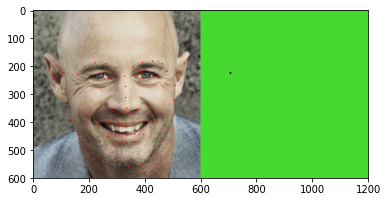

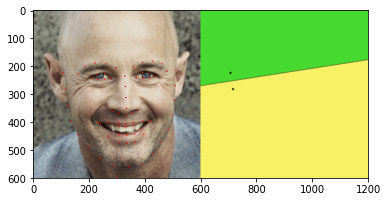

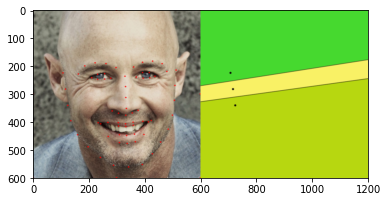

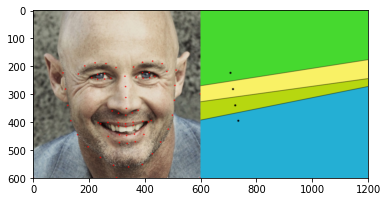

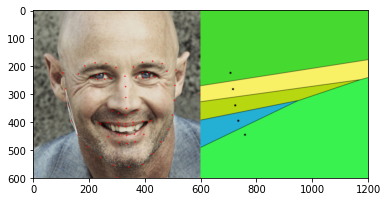

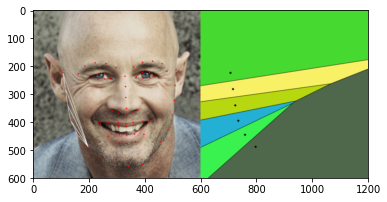

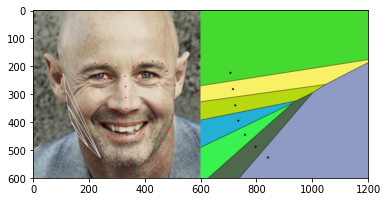

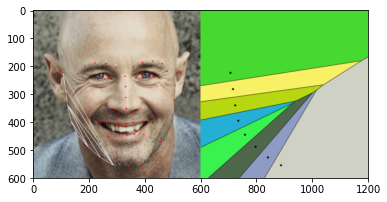

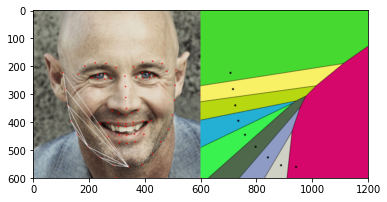

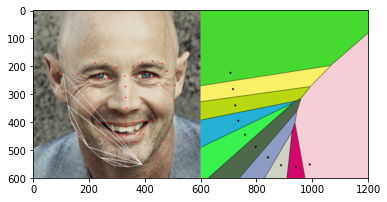

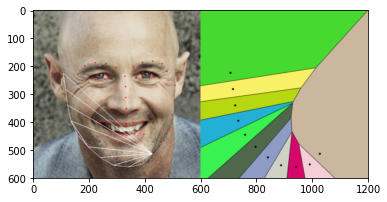

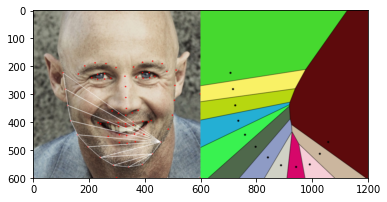

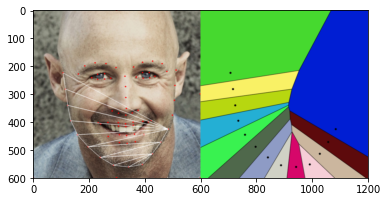

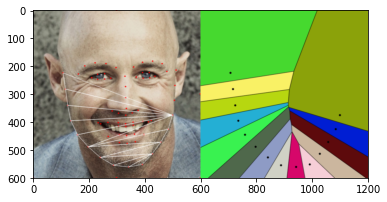

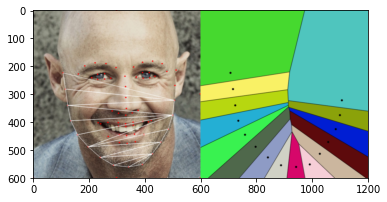

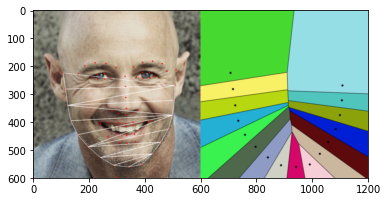

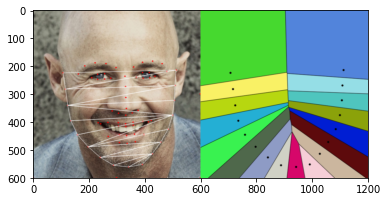

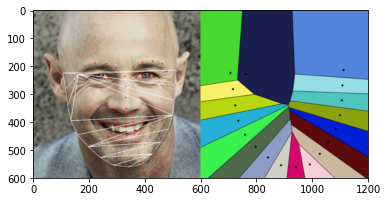

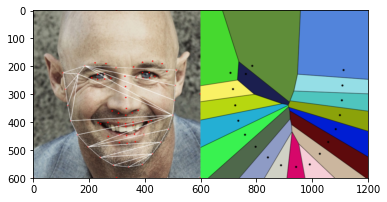

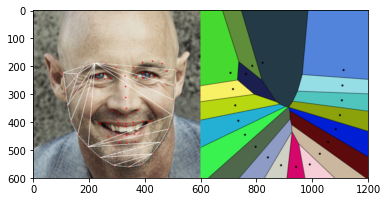

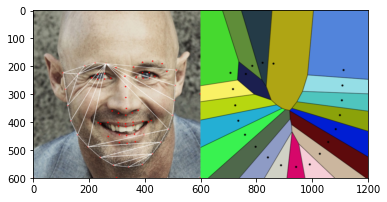

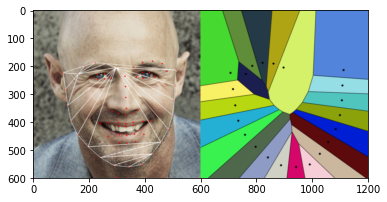

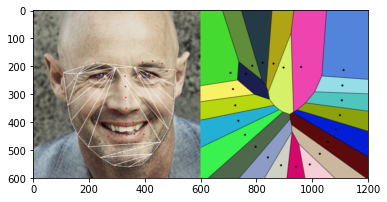

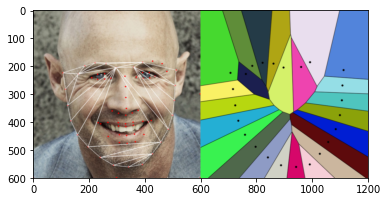

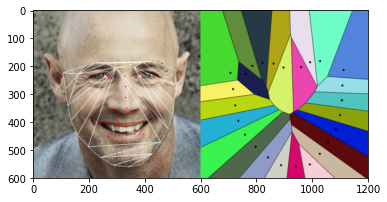

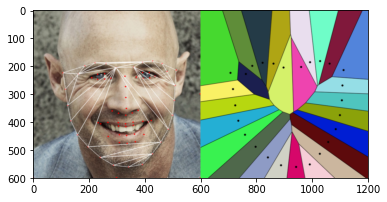

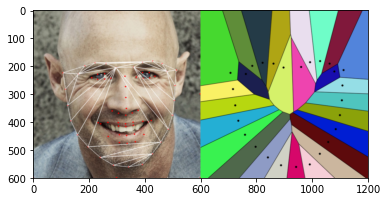

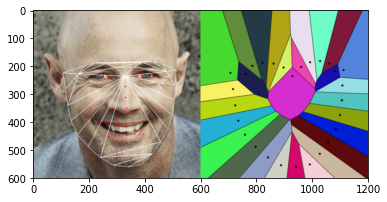

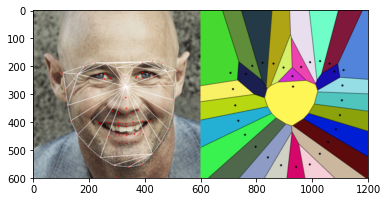

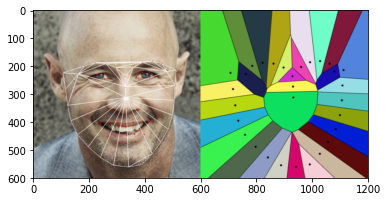

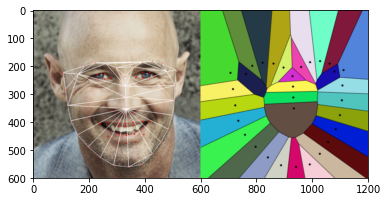

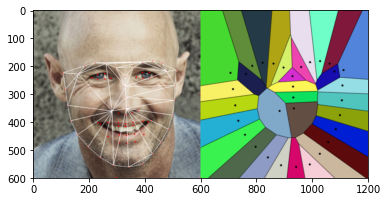

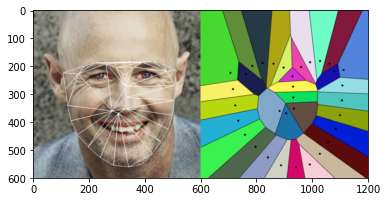

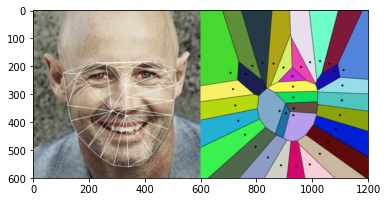

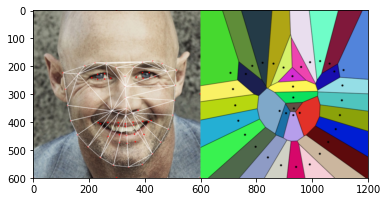

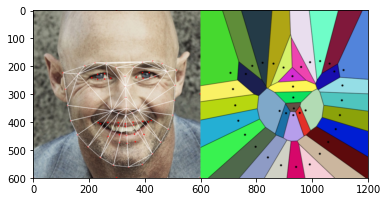

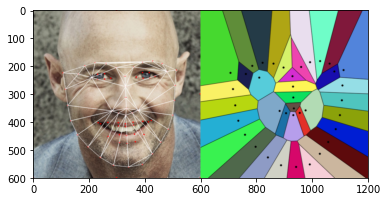

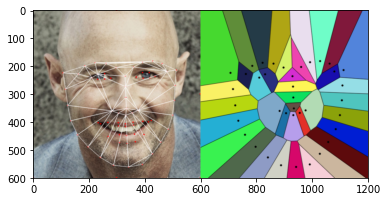

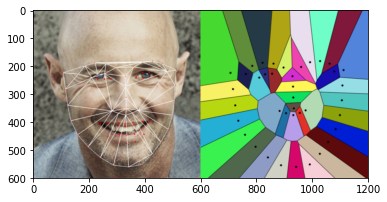

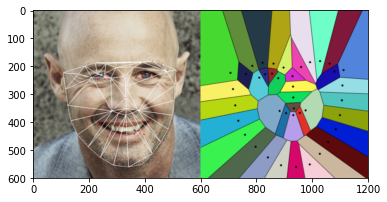

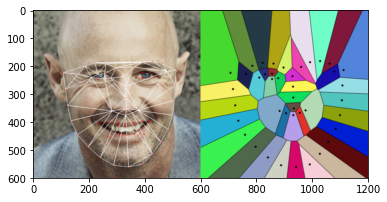

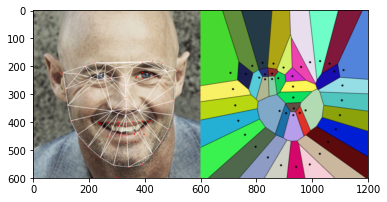

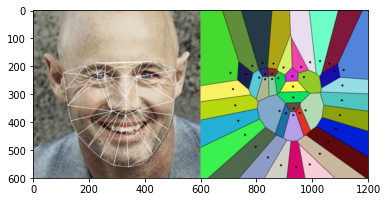

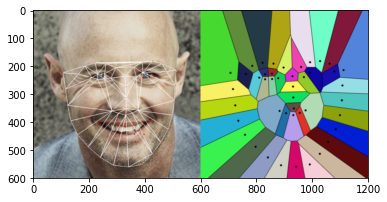

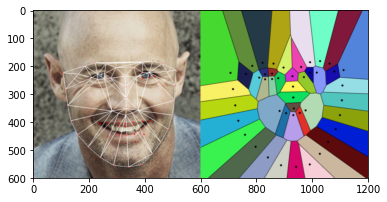

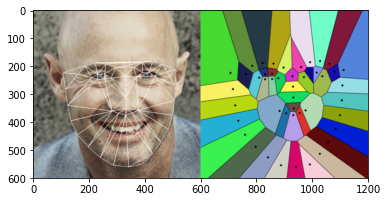

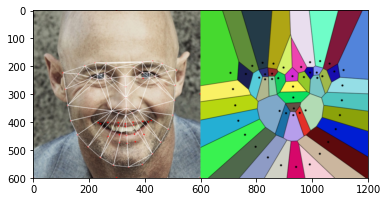

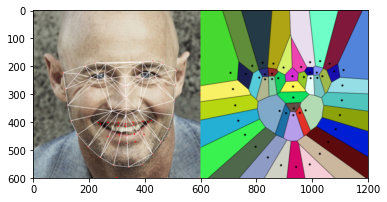

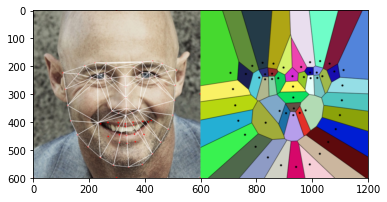

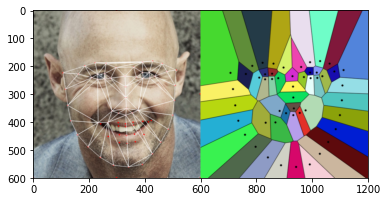

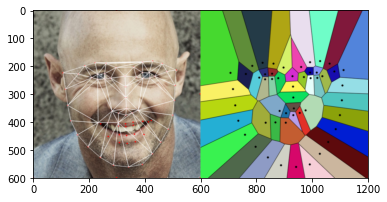

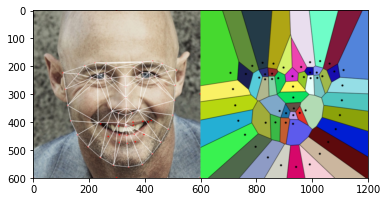

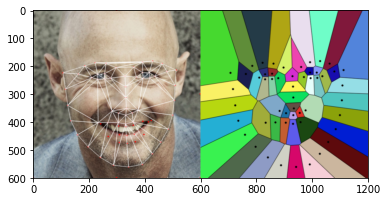

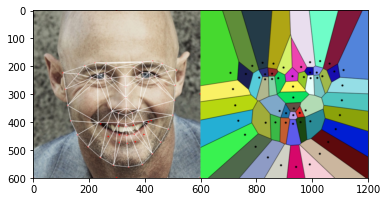

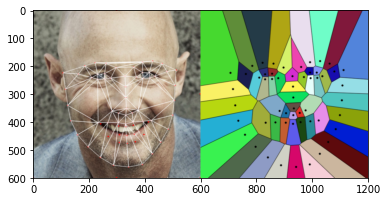

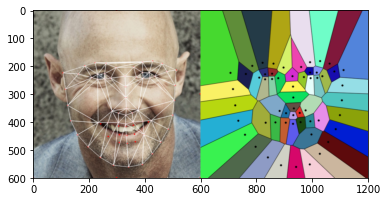

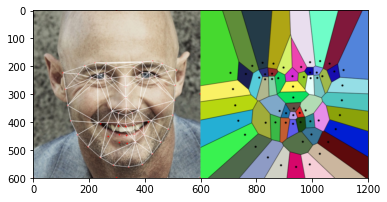

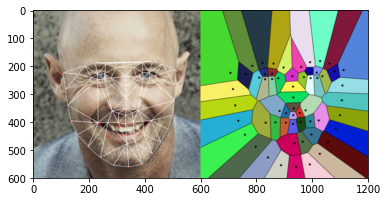

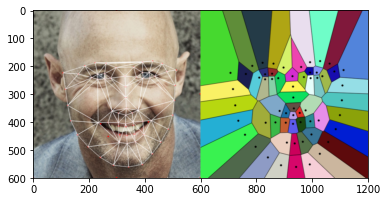

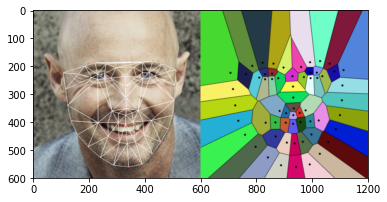

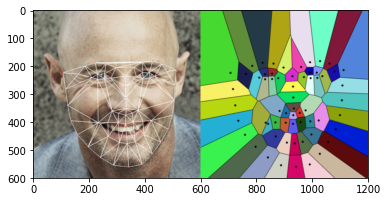

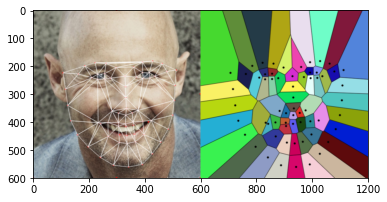

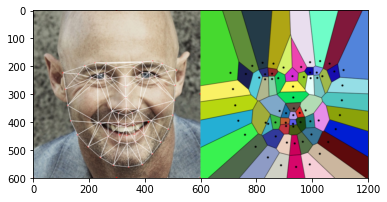

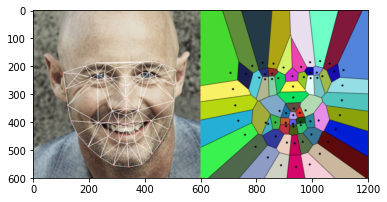

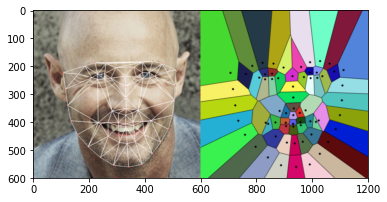

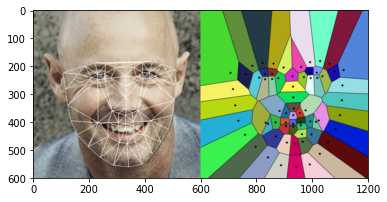

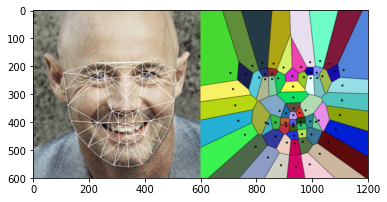

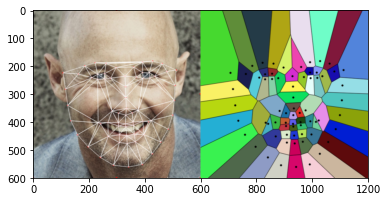

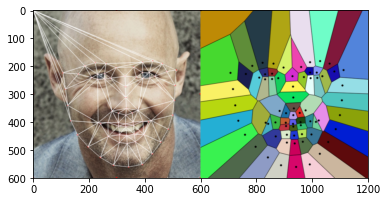

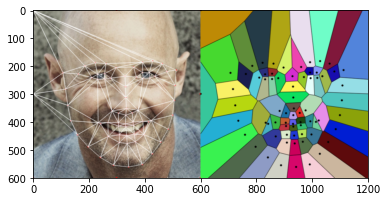

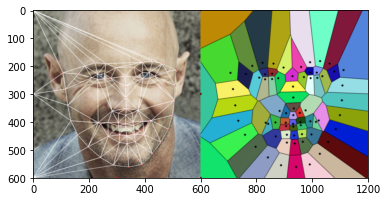

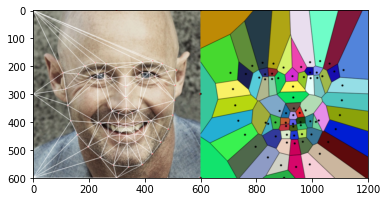

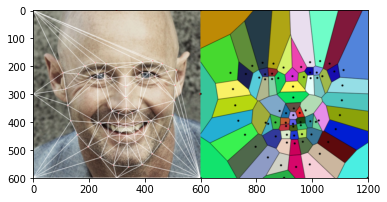

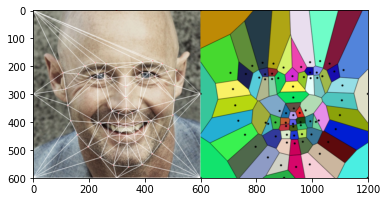

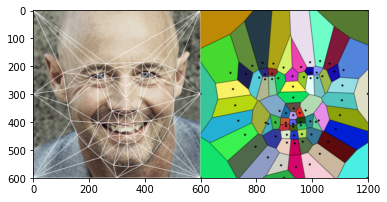

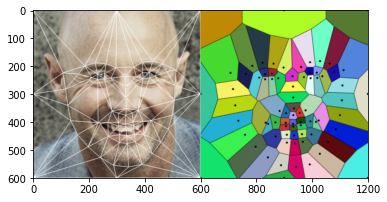

In [109]:
get_landmarks(img)